In [ ]:
from fastai.vision.all import *

In [ ]:
dataset = Path('../dataset/ai-crowd-snake-dataset/')

In [ ]:
Path.BASE_PATH = dataset

In [ ]:
dataset.ls()

(#5) [Path('SnakeCLEF2021_train_metadata_PROD.csv'),Path('species_to_country_mapping.csv'),Path('training_data'),Path('training_data.tar.gz'),Path('SnakeCLEF2021_min-train_metadata_PROD.csv')]

In [ ]:
dataset.ls(file_type='text')

(#3) [Path('SnakeCLEF2021_train_metadata_PROD.csv'),Path('species_to_country_mapping.csv'),Path('SnakeCLEF2021_min-train_metadata_PROD.csv')]

In [ ]:
train_full = pd.read_csv(dataset/'SnakeCLEF2021_train_metadata_PROD.csv')

In [ ]:
train_full.columns

Index(['binomial', 'country', 'continent', 'genus', 'family', 'UUID', 'source',
       'subset', 'class_id', 'image_path'],
      dtype='object')

In [ ]:
train_full

,binomial,country,continent,genus,family,UUID,source,subset,class_id,image_path
0,Pantherophis spiloides,United States of America,North America,Pantherophis,Colubridae,fbc816e9552643a2bce4f655b2f3c4e1,inaturalist,train,523,/Datasets/SnakeCLEF-2021/inaturalist/fbc816e95...
1,Masticophis taeniatus,United States of America,North America,Masticophis,Colubridae,cbc7ad7141a642f2b92ef7fe05c9d608,inaturalist,train,430,/Datasets/SnakeCLEF-2021/inaturalist/cbc7ad714...
2,Crotalus pyrrhus,United States of America,North America,Crotalus,Viperidae,fc4db72953ae4c978ac50acb33adce0c,inaturalist,train,183,/Datasets/SnakeCLEF-2021/inaturalist/fc4db7295...
3,Haldea striatula,United States of America,North America,Haldea,Colubridae,2068c79c956d43dc8a45106e0c808aed,inaturalist,train,305,/Datasets/SnakeCLEF-2021/inaturalist/2068c79c9...
4,Natrix natrix,Russia,Europe,Natrix,Colubridae,3e376aaf4f8d42e991c0c8ddc5972f95,inaturalist,train,471,/Datasets/SnakeCLEF-2021/inaturalist/3e376aaf4...
...,...,...,...,...,...,...,...,...,...,...
386001,Storeria dekayi,United States of America,North America,Storeria,Colubridae,f0a50a4676a34a2f99c3cb2451c6acd5,inaturalist,val,661,/Datasets/SnakeCLEF-2021/inaturalist/f0a50a467...
386002,Thamnophis sirtalis,United States of America,North America,Thamnophis,Colubridae,4513bbe7752d49dabdff2dd6484c82fc,inaturalist,val,706,/Datasets/SnakeCLEF-2021/inaturalist/4513bbe77...
386003,Thamnophis sirtalis,Canada,North America,Thamnophis,Colubridae,fca4ce9644b84454bf2d2967bbfd6597,inaturalist,val,706,/Datasets/SnakeCLEF-2021/inaturalist/fca4ce964...
386004,Pantherophis obsoletus,United States of America,North America,Pantherophis,Colubridae,4650fd94cdc14861a7e12014fcd47520,herpmapper,val,520,/Datasets/SnakeCLEF-2021/herpmapper/4650fd94cd...


In [ ]:
train_full.genus.value_counts()

Thamnophis        44470
Crotalus          36105
Pantherophis      34910
Nerodia           29800
Storeria          22063
                  ...  
Pseudocerastes       24
Nothopsis            24
Ophryacus            22
Bolyeria             21
Orientocoluber       18
Name: genus, Length: 269, dtype: int64

In [ ]:
train_full.family.value_counts()

Colubridae          275507
Viperidae            71505
Elapidae             15086
Boidae                9333
Pythonidae            5446
Lamprophiidae         4332
Typhlopidae           1549
Leptotyphlopidae      1365
Pareidae               715
Homalopsidae           597
Xenodermidae           136
Xenopeltidae            98
Acrochordidae           83
Aniliidae               71
Tropidophiidae          67
Loxocemidae             56
Cylindrophiidae         39
Bolyeriidae             21
Name: family, dtype: int64

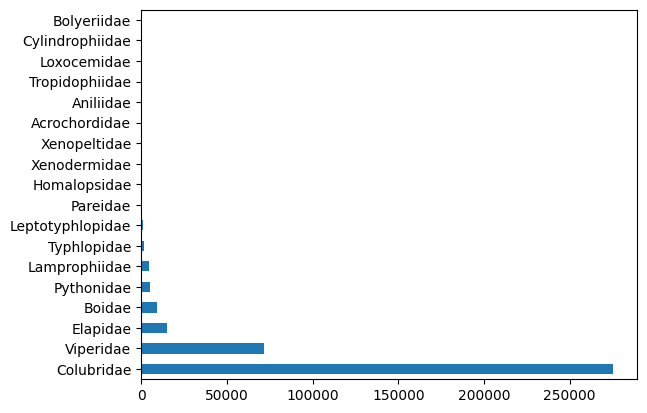

In [ ]:
train_full.family.value_counts().plot.barh();

In [ ]:
train_full.country.value_counts()

United States of America    246482
unknown                      50879
Mexico                       16722
Canada                       12250
Italy                         5182
                             ...  
Comoros                          1
Central African Republic         1
Turkmenistan                     1
Seychelles                       1
Somalia                          1
Name: country, Length: 188, dtype: int64

In [ ]:
train_full.continent.value_counts()

North America    276135
unknown           51061
Europe            18689
Asia              16518
South America     12735
Africa             6017
Australia          4313
Oceania             538
Name: continent, dtype: int64

In [ ]:
train_full.binomial[0].split()[1]

'spiloides'

In [ ]:
def get_species(row):
    _, species = row.binomial.split()
    return species

In [ ]:
train_full.iloc[0].binomial

'Pantherophis spiloides'

In [ ]:
get_species(train_full.iloc[0])

'spiloides'

In [ ]:
train_full['species'] = train_full.apply(get_species, axis=1)

In [ ]:
train_full.head()

,binomial,country,continent,genus,family,UUID,source,subset,class_id,image_path,species
0,Pantherophis spiloides,United States of America,North America,Pantherophis,Colubridae,fbc816e9552643a2bce4f655b2f3c4e1,inaturalist,train,523,/Datasets/SnakeCLEF-2021/inaturalist/fbc816e95...,spiloides
1,Masticophis taeniatus,United States of America,North America,Masticophis,Colubridae,cbc7ad7141a642f2b92ef7fe05c9d608,inaturalist,train,430,/Datasets/SnakeCLEF-2021/inaturalist/cbc7ad714...,taeniatus
2,Crotalus pyrrhus,United States of America,North America,Crotalus,Viperidae,fc4db72953ae4c978ac50acb33adce0c,inaturalist,train,183,/Datasets/SnakeCLEF-2021/inaturalist/fc4db7295...,pyrrhus
3,Haldea striatula,United States of America,North America,Haldea,Colubridae,2068c79c956d43dc8a45106e0c808aed,inaturalist,train,305,/Datasets/SnakeCLEF-2021/inaturalist/2068c79c9...,striatula
4,Natrix natrix,Russia,Europe,Natrix,Colubridae,3e376aaf4f8d42e991c0c8ddc5972f95,inaturalist,train,471,/Datasets/SnakeCLEF-2021/inaturalist/3e376aaf4...,natrix


In [ ]:
train_full['species'].value_counts()

sirtalis           22163
dekayi             17535
obsoletus          13012
atrox              12736
sipedon            12211
                   ...  
transcaucasiana       22
undulatus             22
multocarinata         21
spinalis              18
baroni                12
Name: species, Length: 680, dtype: int64

In [ ]:
train_full.dtypes

binomial      object
country       object
continent     object
genus         object
family        object
UUID          object
source        object
subset        object
class_id       int64
image_path    object
species       object
dtype: object

In [ ]:
train_full.describe(include='object')

,binomial,country,continent,genus,family,UUID,source,subset,image_path,species
count,386006,386006,386006,386006,386006,386006,386006,386006,386006,386006
unique,772,188,8,269,18,386006,3,2,386006,680
top,Thamnophis sirtalis,United States of America,North America,Thamnophis,Colubridae,fbc816e9552643a2bce4f655b2f3c4e1,inaturalist,train,/Datasets/SnakeCLEF-2021/inaturalist/fbc816e95...,sirtalis
freq,22163,246482,276135,44470,275507,1,277025,347405,1,22163


In [ ]:
files = get_image_files(dataset)
files

(#386007) [Path('training_data/SnakeCLEF-2021/inaturalist/1253ce5e30d540b590a15724853e8d88.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/00088eefa52e4792b8c195de57a1958a.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/14494d94223b4089aa1e6c5118158097.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/6f8ea147e3f74cbdb2b0eea167a20e81.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/34e32ba9b80f404494c9a8d2f6cf44a4.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/64db3f5421c942b59316a4e3f539d590.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/26facaaf88494c1ab07b2c82c679134f.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/2398a0d3fce14968b7a0e04e1ca07311.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/210991611f1b4218b9d3500f253da339.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/6e52f9d8fe364213a5b295b8f00b594a.jpg')...]

In [ ]:
sample = files[0]
sample

Path('training_data/SnakeCLEF-2021/inaturalist/1253ce5e30d540b590a15724853e8d88.jpg')

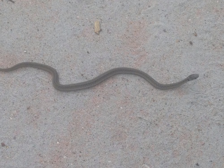

In [ ]:
im = Image.open(sample)
im.to_thumb(224)

In [ ]:
sample.name[:-4]

'1253ce5e30d540b590a15724853e8d88'

In [ ]:
sample_row = train_full.loc[train_full.UUID == sample.name[:-4]]

In [ ]:
sample_row

,binomial,country,continent,genus,family,UUID,source,subset,class_id,image_path,species
242893,Storeria dekayi,United States of America,North America,Storeria,Colubridae,1253ce5e30d540b590a15724853e8d88,inaturalist,train,661,/Datasets/SnakeCLEF-2021/inaturalist/1253ce5e30d540b590a15724853e8d88.jpg,dekayi


In [ ]:
train_min = pd.read_csv(dataset/'SnakeCLEF2021_min-train_metadata_PROD.csv')
train_min['species'] = train_min.apply(get_species, axis=1)

In [ ]:
train_min

,binomial,country,continent,genus,family,UUID,source,subset,class_id,image_path,species
0,Acanthophis antarcticus,Australia,Australia,Acanthophis,Elapidae,77d9e2cb84d54ead8b73cd08418f59e8,inaturalist,train,0,/Datasets/SnakeCLEF-2021/inaturalist/77d9e2cb84d54ead8b73cd08418f59e8.jpg,antarcticus
1,Acanthophis antarcticus,Australia,Australia,Acanthophis,Elapidae,2e517a1984fe47a49d59e4032151cf9f,inaturalist,train,0,/Datasets/SnakeCLEF-2021/inaturalist/2e517a1984fe47a49d59e4032151cf9f.jpg,antarcticus
2,Acanthophis antarcticus,Australia,Australia,Acanthophis,Elapidae,ba0f5ec4d87545caa9fa4a7978c1acb2,inaturalist,train,0,/Datasets/SnakeCLEF-2021/inaturalist/ba0f5ec4d87545caa9fa4a7978c1acb2.jpg,antarcticus
3,Acanthophis antarcticus,Australia,Australia,Acanthophis,Elapidae,52a171f7b32b49aba243e1f46ab5cf27,inaturalist,train,0,/Datasets/SnakeCLEF-2021/inaturalist/52a171f7b32b49aba243e1f46ab5cf27.jpg,antarcticus
4,Acanthophis antarcticus,Australia,Australia,Acanthophis,Elapidae,cb012d880a3d4a509ce91a6105164e33,inaturalist,train,0,/Datasets/SnakeCLEF-2021/inaturalist/cb012d880a3d4a509ce91a6105164e33.jpg,antarcticus
...,...,...,...,...,...,...,...,...,...,...,...
70203,Zamenis situla,Greece,Europe,Zamenis,Colubridae,ac70575e3f8043bc96f170540f4203b3,inaturalist,train,771,/Datasets/SnakeCLEF-2021/inaturalist/ac70575e3f8043bc96f170540f4203b3.jpg,situla
70204,Zamenis situla,Croatia,Europe,Zamenis,Colubridae,d5c3f14ffe764872873185afbe73ddc0,inaturalist,train,771,/Datasets/SnakeCLEF-2021/inaturalist/d5c3f14ffe764872873185afbe73ddc0.jpg,situla
70205,Zamenis situla,Greece,Europe,Zamenis,Colubridae,77a5d38a5c474c38aa7ecec774d749a2,inaturalist,train,771,/Datasets/SnakeCLEF-2021/inaturalist/77a5d38a5c474c38aa7ecec774d749a2.jpg,situla
70206,Zamenis situla,Albania,Europe,Zamenis,Colubridae,eab10091e2c544efa1c9eabfcb0422ba,inaturalist,train,771,/Datasets/SnakeCLEF-2021/inaturalist/eab10091e2c544efa1c9eabfcb0422ba.jpg,situla


In [ ]:
train_min.describe(include='object')

,binomial,country,continent,genus,family,UUID,source,subset,image_path,species
count,70208,70208,70208,70208,70208,70208,70208,70208,70208,70208
unique,768,178,8,267,17,70208,2,1,70208,677
top,Pantherophis obsoletus,United States of America,North America,Crotalus,Colubridae,77d9e2cb84d54ead8b73cd08418f59e8,inaturalist,train,/Datasets/SnakeCLEF-2021/inaturalist/77d9e2cb84d54ead8b73cd08418f59e8.jpg,elegans
freq,299,27412,37139,4892,44728,1,59516,70208,1,533


In [ ]:
train_min.genus.value_counts()

Crotalus          4892
Thamnophis        3812
Lampropeltis      3317
Pantherophis      2138
Nerodia           2078
                  ... 
Denisonia            7
Fordonia             7
Pseudocerastes       4
Erpeton              3
Ramphotyphlops       1
Name: genus, Length: 267, dtype: int64

In [ ]:
train_min.species.value_counts()

elegans           533
constrictor       503
atrox             472
lateralis         404
scalaris          369
                 ... 
bredli              2
hawkei              1
curtus              1
microlepidotus      1
bipartitus          1
Name: species, Length: 677, dtype: int64

In [ ]:
train_min.continent.value_counts()

North America    37139
Asia             10432
South America     7781
Europe            4550
Africa            4271
unknown           3261
Australia         2396
Oceania            378
Name: continent, dtype: int64

In [ ]:
files

(#386007) [Path('training_data/SnakeCLEF-2021/inaturalist/1253ce5e30d540b590a15724853e8d88.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/00088eefa52e4792b8c195de57a1958a.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/14494d94223b4089aa1e6c5118158097.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/6f8ea147e3f74cbdb2b0eea167a20e81.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/34e32ba9b80f404494c9a8d2f6cf44a4.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/64db3f5421c942b59316a4e3f539d590.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/26facaaf88494c1ab07b2c82c679134f.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/2398a0d3fce14968b7a0e04e1ca07311.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/210991611f1b4218b9d3500f253da339.jpg'),Path('training_data/SnakeCLEF-2021/inaturalist/6e52f9d8fe364213a5b295b8f00b594a.jpg')...]

In [ ]:
files[0].suffix

'.jpg'